In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("Titanic_train.csv")
test=pd.read_csv("Titanic_test.csv")

In [3]:
train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN


In [4]:
test.head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN


### Getting Insights from Train Data

Check For Missing Values

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
dtype: int64

In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
dtype: int64

In [7]:
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
train["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [9]:
train["Parch"].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [10]:
%matplotlib inline
sns.set()

In [11]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

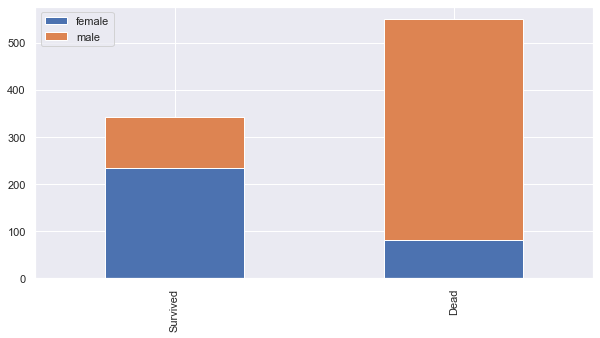

In [12]:
bar_chart('Sex')

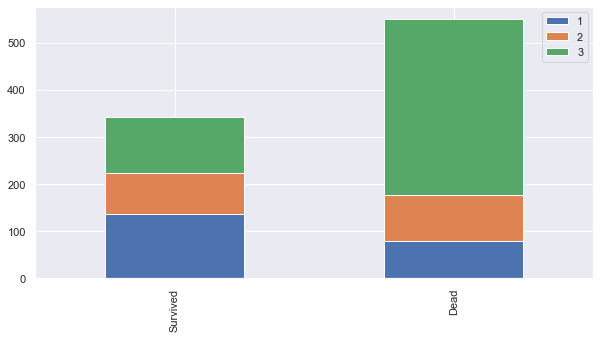

In [13]:
bar_chart('Pclass')

# Feature Engineering

## Name (Extracting Titles )

In [14]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [15]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Jonkheer      1
Lady          1
Capt          1
Don           1
Ms            1
Countess      1
Mme           1
Sir           1
Name: Title, dtype: int64

In [16]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

#### Title mapping
Mr : 0  
Miss : 1  
Mrs: 2  
Others: 3

In [17]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0


In [19]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,2


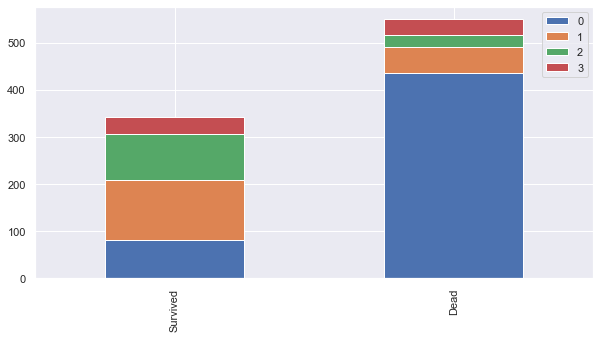

In [20]:
bar_chart('Title')

### Dropping Name Feature

In [21]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,0


###  Sex

male: 0
female: 1

In [23]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

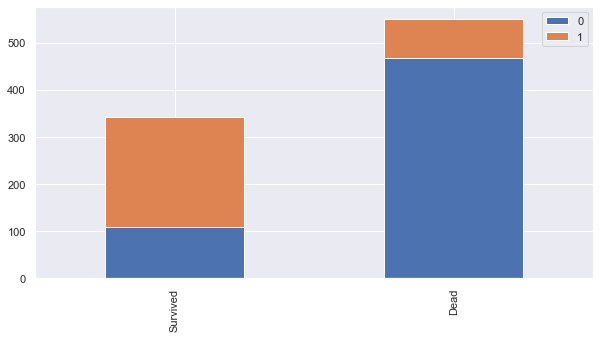

In [24]:
bar_chart('Sex')

###  Age

####  some age is missing
Let's use Title's median age for missing Age

In [25]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [26]:
train.head(30)
train.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

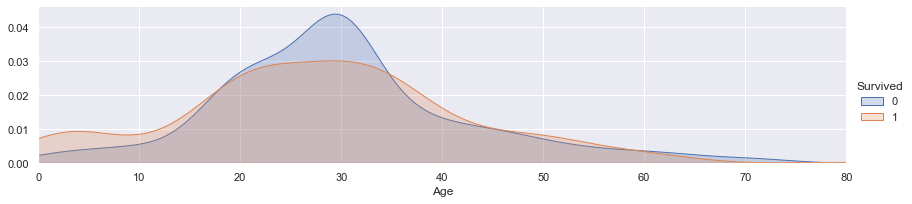

In [27]:
import seaborn as sns
sns.set()
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() 

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 32.8+ KB


####  Binning
Binning/Converting Numerical Age to Categorical Variable  

feature vector map:  
child: 0  
young: 1  
adult: 2  
mid-age: 3  
senior: 4

In [30]:
for i in range(len(train)):
    if train.iloc[i,4] <=16:
        train.iloc[i,4]=0
    elif (train.iloc[i,4] > 16) & (train.iloc[i,4] <= 26) :
        train.iloc[i,4]=1
    elif (train.iloc[i,4] > 26) & (train.iloc[i,4] <= 36) :
        train.iloc[i,4]=2
    elif (train.iloc[i,4] > 36) & (train.iloc[i,4] <= 62) :
        train.iloc[i,4]=3
    elif (train.iloc[i,4] > 62):
        train.iloc[i,4]=4
        
    

In [31]:
train.head(15)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,2


In [32]:
for i in range(len(test)):
    if test.iloc[i,3] <=16:
        test.iloc[i,3]=0
    elif (test.iloc[i,3] > 16) & (test.iloc[i,3] <= 26) :
        test.iloc[i,3]=1
    elif (test.iloc[i,3] > 26) & (test.iloc[i,3] <= 36) :
        test.iloc[i,3]=2
    elif (test.iloc[i,3] > 36) & (test.iloc[i,3] <= 62) :
        test.iloc[i,3]=3
    elif (test.iloc[i,3] > 62):
        test.iloc[i,3]=4
        

In [33]:
test.head(15)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title
0,892,3,0,2.0,0,0,330911,7.8292,NaN,0
1,893,3,1,3.0,1,0,363272,7.0000,NaN,2
2,894,2,0,3.0,0,0,240276,9.6875,NaN,0
3,895,3,0,2.0,0,0,315154,8.6625,NaN,0
4,896,3,1,1.0,1,1,3101298,12.2875,NaN,2
5,897,3,0,0.0,0,0,7538,9.2250,NaN,0
6,898,3,1,2.0,0,0,330972,7.6292,NaN,1
7,899,2,0,1.0,1,1,248738,29.0000,NaN,0
8,900,3,1,1.0,0,0,2657,7.2292,NaN,2
9,901,3,0,1.0,2,0,A/4 48871,24.1500,NaN,0


### Fair

In [34]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0


In [35]:
for i in range(len(train)):
    if train.iloc[i,8] <=17:
        train.iloc[i,8]=0
    elif (train.iloc[i,8] > 17) & (train.iloc[i,8] <= 30) :
        train.iloc[i,8]=1
    elif (train.iloc[i,8] > 30) & (train.iloc[i,8] <= 100) :
        train.iloc[i,8]=2
    elif (train.iloc[i,8] > 100):
        train.iloc[i,8]=3
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0


In [36]:
for i in range(len(test)):
    if test.iloc[i,7] <=17:
        test.iloc[i,7]=0
    elif (test.iloc[i,7] > 17) & (test.iloc[i,7] <= 30) :
        test.iloc[i,7]=1
    elif (test.iloc[i,7] > 30) & (test.iloc[i,7] <= 100) :
        test.iloc[i,7]=2
    elif (test.iloc[i,7] > 100):
        test.iloc[i,7]=3
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title
0,892,3,0,2.0,0,0,330911,0.0,NaN,0
1,893,3,1,3.0,1,0,363272,0.0,NaN,2
2,894,2,0,3.0,0,0,240276,0.0,NaN,0
3,895,3,0,2.0,0,0,315154,0.0,NaN,0
4,896,3,1,1.0,1,1,3101298,0.0,NaN,2


### Cabin

In [37]:
train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
E101           3
F33            3
              ..
B102           1
B38            1
A23            1
C111           1
E77            1
Name: Cabin, Length: 147, dtype: int64

In [38]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<AxesSubplot:>

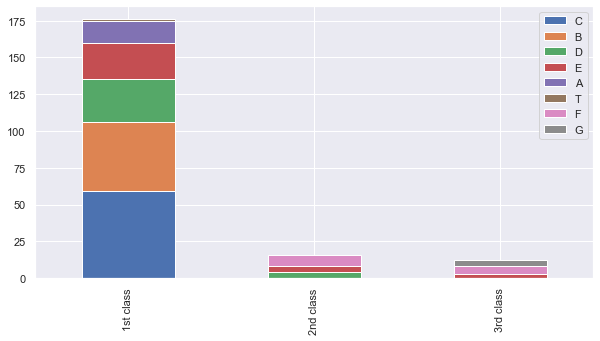

In [39]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [40]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [41]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

###  FamilySize

In [42]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [43]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0.0


In [45]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,FamilySize
0,892,3,0,2.0,0,0,330911,0.0,2.0,0,0.0
1,893,3,1,3.0,1,0,363272,0.0,2.0,2,0.4
2,894,2,0,3.0,0,0,240276,0.0,2.0,0,0.0
3,895,3,0,2.0,0,0,315154,0.0,2.0,0,0.0
4,896,3,1,1.0,1,1,3101298,0.0,2.0,2,0.8


### Dropping Features

In [46]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [47]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 7), (891,))

In [48]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0.4
1,1,1,3.0,2.0,0.8,2,0.4
2,3,1,1.0,0.0,2.0,1,0.0
3,1,1,2.0,2.0,0.8,2,0.4
4,3,0,2.0,0.0,2.0,0,0.0
5,3,0,2.0,0.0,2.0,0,0.0
6,1,0,3.0,2.0,1.6,0,0.0
7,3,0,0.0,1.0,2.0,3,1.6
8,3,1,2.0,0.0,2.0,2,0.8
9,2,1,0.0,2.0,1.8,2,0.4


In [49]:
train_data['Survived']=target
train_data.to_csv("modified.csv",index=False)

In [50]:
data=pd.read_csv("modified.csv")
data.head()

,Pclass,Sex,Age,Fare,Cabin,Title,FamilySize,Survived
0,3,0,1.0,0.0,2.0,0,0.4,0
1,1,1,3.0,2.0,0.8,2,0.4,1
2,3,1,1.0,0.0,2.0,1,0.0,1
3,1,1,2.0,2.0,0.8,2,0.4,1
4,3,0,2.0,0.0,2.0,0,0.0,0


## Modelling

In [91]:
X_train=data.copy()
y_train=data["Survived"]

In [153]:
class NaiveBayes:
    def __init__(self):
        pass
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors =  np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y==c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def PredictandAcc(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)
            
        # return class with highest posterior probability
        return self._classes[np.argmax(posteriors)]
            

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        #numerator = math.exp((x-mean)**2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return denominator

In [154]:
cl=NaiveBayes()

In [155]:
cl.fit(X_train, y_train)

In [156]:
predict=cl.PredictandAcc(X_train)
predict

<ipython-input-153-6e5343953ae5>:30: RuntimeWarning: divide by zero encountered in log
  posterior = np.sum(np.log(self._pdf(idx, x)))


array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)